In [0]:
import tensorflow as tf
print(tf.__version__)

In [0]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [0]:
type(data)

In [0]:
data

In [0]:
data.keys()

In [0]:
data.data.shape

In [0]:
data.target

In [0]:
data.target_names

In [0]:
len(data.target)

In [0]:
data.feature_names

# Training & Testing

In [0]:
from sklearn.model_selection import train_test_split as tts

In [0]:
X_train,X_test,y_train,y_test = tts(data.data,data.target,test_size = 0.33)
N , D = X_train.shape #Returns shape like (rows,columns)

In [34]:
print(N,D)

381 30


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #fit on X_train
X_test = scaler.transform(X_test) #trainsform on X_test

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [0]:
model.compile(optimizer="adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [38]:
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 16ms/step - loss: 0.7205 - accuracy: 0.6588 - val_loss: 0.6477 - val_accuracy: 0.7074
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6685 - accuracy: 0.6877 - val_loss: 0.6002 - val_accuracy: 0.7234
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6218 - accuracy: 0.7087 - val_loss: 0.5575 - val_accuracy: 0.7606
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5801 - accuracy: 0.7323 - val_loss: 0.5193 - val_accuracy: 0.7819
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5433 - accuracy: 0.7507 - val_loss: 0.4851 - val_accuracy: 0.7872
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5098 - accuracy: 0.7900 - val_loss: 0.4551 - val_accuracy: 0.7979
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4794 - accuracy: 0.7927 - val_loss: 0.4277 - val_accuracy: 0.8245
Epoch 8/100


In [39]:
print("Train score:", model.evaluate(X_train,y_train))
print("Test score:", model.evaluate(X_test,y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.0872 - accuracy: 0.9843
Train score: [0.08723120391368866, 0.9842519760131836]
6/6 [==============================] - 0s 2ms/step - loss: 0.1046 - accuracy: 0.9734
Test score: [0.10455960780382156, 0.9734042286872864]


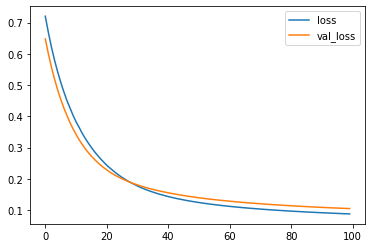

In [56]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

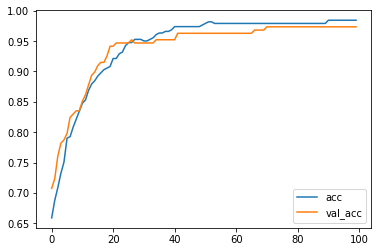

In [63]:
plt.plot(r.history['accuracy'],label = 'acc')
plt.plot(r.history['val_accuracy'],label = 'val_acc')
plt.legend()